# Final Project 
## Team Members: Olivia Arena, Deja McCauley, Lindsey Morris and Cassie Truong 
### Assessing Median Income Data in Philly and Logan
##### Updated Research Question: What is the relationship between historically redlined neighborhoods, lead exposure, and housing investments in Logan, Philadelphia?
###### Source: Open Data Philly 



In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import folium 

# for network analysis
import networkx as nx

import numpy as np

In [2]:
df=pd.read_csv(
    'data/median_income.csv',
    dtype= 
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [3]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_A14007_001,SE_A14007_002,SE_A14007_003,SE_A14007_004,SE_A14007_005,SE_A14007_006,SE_A14007_007,SE_A14007_008,SE_A14007_009,SE_A14007_010
0,42101000101,"Census Tract 1.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8807,NaN,NaN,NaN,...,104052.0,109275.0,NaN,NaN,142708.0,NaN,NaN,NaN,NaN,108007.0
1,42101000102,"Census Tract 1.02, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8808,NaN,NaN,NaN,...,91944.0,103958.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103819.0
2,42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8809,NaN,NaN,NaN,...,91067.0,NaN,NaN,NaN,70875.0,NaN,NaN,41156.0,NaN,250001.0
3,42101000300,"Census Tract 3, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8810,NaN,NaN,NaN,...,86782.0,99306.0,26061.0,NaN,97865.0,NaN,NaN,86262.0,71552.0,114875.0
4,42101000401,"Census Tract 4.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8811,NaN,NaN,NaN,...,67188.0,62885.0,78539.0,NaN,55625.0,NaN,NaN,49906.0,86625.0,62348.0


In [4]:
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       408 non-null    object 
 1   Geo_QName      408 non-null    object 
 2   Geo_FILEID     408 non-null    object 
 3   Geo_STUSAB     408 non-null    object 
 4   Geo_SUMLEV     408 non-null    int64  
 5   Geo_GEOCOMP    408 non-null    int64  
 6   Geo_LOGRECNO   408 non-null    int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      408 non-null    object 
 12  Geo_COUNTY     408 non-null    object 
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      408 non-null    int64  
 16  Geo_BLKGRP     0 non-null      float64
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AIANHH

In [5]:
#dropping and deleting null columns, list of fields below have no data in them 
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE',
 'SE_A14007_006']

In [6]:
#dropping columns with no data 
df=df.dropna(axis=1,how="all")

In [7]:
#check data with dropped null columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       408 non-null    object 
 1   Geo_QName      408 non-null    object 
 2   Geo_FILEID     408 non-null    object 
 3   Geo_STUSAB     408 non-null    object 
 4   Geo_SUMLEV     408 non-null    int64  
 5   Geo_GEOCOMP    408 non-null    int64  
 6   Geo_LOGRECNO   408 non-null    int64  
 7   Geo_STATE      408 non-null    object 
 8   Geo_COUNTY     408 non-null    object 
 9   Geo_TRACT      408 non-null    int64  
 10  Geo_GEOID      408 non-null    object 
 11  Geo_NAME       408 non-null    object 
 12  SE_A14007_001  382 non-null    float64
 13  SE_A14007_002  306 non-null    float64
 14  SE_A14007_003  274 non-null    float64
 15  SE_A14007_004  1 non-null      float64
 16  SE_A14007_005  148 non-null    float64
 17  SE_A14007_007  64 non-null     float64
 18  SE_A14007_

In [8]:
#reinspect the data
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,Geo_NAME,SE_A14007_001,SE_A14007_002,SE_A14007_003,SE_A14007_004,SE_A14007_005,SE_A14007_007,SE_A14007_008,SE_A14007_009,SE_A14007_010
0,42101000101,"Census Tract 1.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8807,42,101,101,...,Census Tract 1.01,104052.0,109275.0,NaN,NaN,142708.0,NaN,NaN,NaN,108007.0
1,42101000102,"Census Tract 1.02, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8808,42,101,102,...,Census Tract 1.02,91944.0,103958.0,NaN,NaN,NaN,NaN,NaN,NaN,103819.0
2,42101000200,"Census Tract 2, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8809,42,101,200,...,Census Tract 2,91067.0,NaN,NaN,NaN,70875.0,NaN,41156.0,NaN,250001.0
3,42101000300,"Census Tract 3, Philadelphia County, Pennsylvania",ACSSF,pa,140,0,8810,42,101,300,...,Census Tract 3,86782.0,99306.0,26061.0,NaN,97865.0,NaN,86262.0,71552.0,114875.0
4,42101000401,"Census Tract 4.01, Philadelphia County, Pennsy...",ACSSF,pa,140,0,8811,42,101,401,...,Census Tract 4.01,67188.0,62885.0,78539.0,NaN,55625.0,NaN,49906.0,86625.0,62348.0


In [9]:
#define columns to keep
columns_to_keep=['Geo_FIPS',
                 'SE_A14007_001',
                 'SE_A14007_002',
                 'SE_A14007_003',
                 'SE_A14007_004',
                 'SE_A14007_005',
                 'SE_A14007_007',
                 'SE_A14007_008',
                 'SE_A14007_009',
                 'SE_A14007_010',]
#add it to a new dataframe
df2=df[columns_to_keep]

In [10]:
#look at columns in new dataframe, same as df.columns.to_list
columns=list(df2)
columns

['Geo_FIPS',
 'SE_A14007_001',
 'SE_A14007_002',
 'SE_A14007_003',
 'SE_A14007_004',
 'SE_A14007_005',
 'SE_A14007_007',
 'SE_A14007_008',
 'SE_A14007_009',
 'SE_A14007_010']

In [11]:
df2.columns=['FIPS',
             'Median Household Income',
             'Median Household Income White',
             'Median Household Income Black',
             'Median Household Income Asian',
             'Median Household Income Native Hawaiian Pacific Islander',
             'Median Household Income Some Other Race',
             'Median Household Income Two or More Races',
             'Median Household Income Hispanic',
             'Median Household Income White Alone Not Hispanic']

In [12]:
df2.sample(5)

,FIPS,Median Household Income,Median Household Income White,Median Household Income Black,Median Household Income Asian,Median Household Income Native Hawaiian Pacific Islander,Median Household Income Some Other Race,Median Household Income Two or More Races,Median Household Income Hispanic,Median Household Income White Alone Not Hispanic
291,42101030501,39863.0,50333.0,38902.0,NaN,45804.0,39400.0,NaN,37750.0,51833.0
68,42101006400,32191.0,NaN,36821.0,NaN,NaN,NaN,NaN,NaN,NaN
256,42101026800,41220.0,73654.0,39530.0,NaN,38287.0,NaN,NaN,72870.0,93042.0
349,42101035702,48333.0,51490.0,NaN,NaN,65729.0,NaN,NaN,NaN,51731.0
195,42101019501,20486.0,16500.0,NaN,NaN,NaN,20489.0,NaN,17639.0,21034.0


In [13]:
#what is the average number of median income in philly per census tract
df2['Median Household Income'].mean()

58714.34293193717

In [14]:
#what is the average median income for black people in philly per census tract
df2['Median Household Income Black'].mean()

48049.49635036496

In [15]:
#what is the average median income for white people in philly per census tract
df2['Median Household Income White'].mean()

70310.55882352941

In [16]:
df2['Median Household Income'].describe()

count       382.000000
mean      58714.342932
std       30689.690673
min       11955.000000
25%       36067.000000
50%       52744.500000
75%       74719.250000
max      210322.000000
Name: Median Household Income, dtype: float64

In [17]:
#same for median household income
df_sorted= df2.sort_values(by= 'Median Household Income',ascending= False)

In [18]:
df_sorted[['FIPS','Median Household Income']].head(10)

,FIPS,Median Household Income
209,42101020702,210322.0
24,42101001301,174327.0
18,42101001002,169531.0
14,42101000806,166885.0
5,42101000403,165890.0
364,42101036700,150952.0
28,42101001600,147782.0
363,42101036600,144659.0
380,42101038600,144531.0
31,42101001900,138093.0


In [19]:
import geopandas as gpd

In [20]:
#read in a gejson file downloaded from the philly open data portal census tract data 
tracts=gpd.read_file('data/Philly Census_Tracts_2010.geojson')
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


<AxesSubplot: >

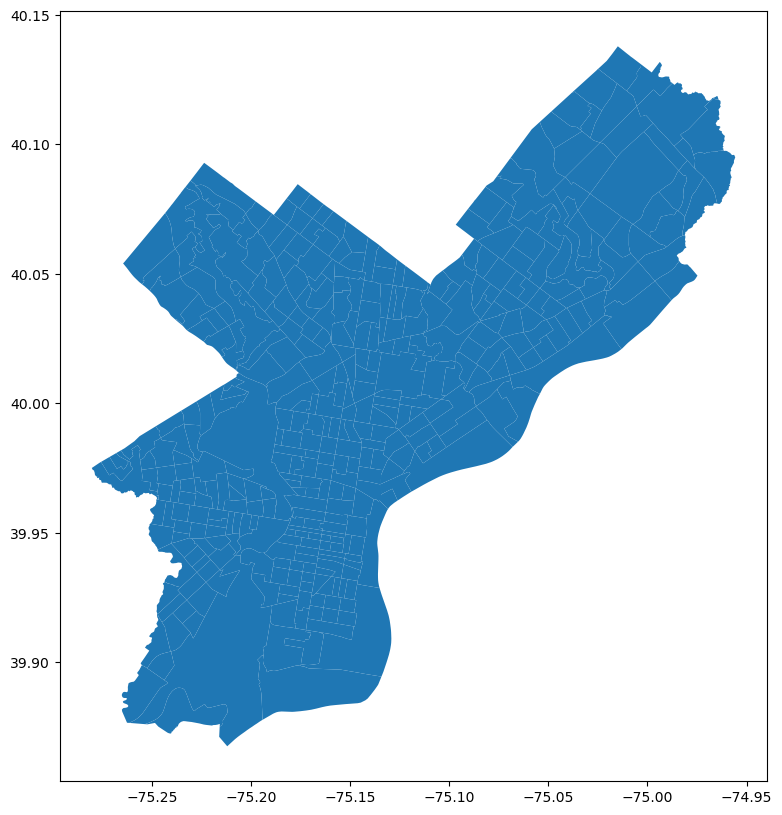

In [21]:
tracts.plot(figsize=(12,10)) #plot the census tracts 

In [22]:
#more about the data 
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    384 non-null    int64   
 1   STATEFP10   384 non-null    object  
 2   COUNTYFP10  384 non-null    object  
 3   TRACTCE10   384 non-null    object  
 4   GEOID10     384 non-null    object  
 5   NAME10      384 non-null    object  
 6   NAMELSAD10  384 non-null    object  
 7   MTFCC10     384 non-null    object  
 8   FUNCSTAT10  384 non-null    object  
 9   ALAND10     384 non-null    int64   
 10  AWATER10    384 non-null    int64   
 11  INTPTLAT10  384 non-null    object  
 12  INTPTLON10  384 non-null    object  
 13  LOGRECNO    384 non-null    object  
 14  geometry    384 non-null    geometry
dtypes: geometry(1), int64(3), object(11)
memory usage: 45.1+ KB


In [23]:
#subset the data for FIPS and geometry 
tracts=tracts[['GEOID10','geometry']]

In [24]:
tracts.head() #check the data 

,GEOID10,geometry
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [25]:
columns=list(tracts)
columns

['GEOID10', 'geometry']

In [26]:
tracts.columns=['FIPS',
                'geometry']

In [27]:
tracts.sample(5)

,FIPS,geometry
291,42101035200,"POLYGON ((-74.98437 40.05779, -74.98429 40.057..."
96,42101024600,"POLYGON ((-75.17638 40.03774, -75.17615 40.037..."
346,42101027100,"POLYGON ((-75.12334 40.04657, -75.12326 40.046..."
242,42101017500,"POLYGON ((-75.13930 40.00306, -75.13988 40.002..."
231,42101012100,"POLYGON ((-75.22568 39.99326, -75.22568 39.993..."


In [28]:
#create a new datafram based on join to merge employment and tract data to create a map 
tracts_income=tracts.merge(df2,on="FIPS")

In [29]:
tracts_income.head()

,FIPS,geometry,Median Household Income,Median Household Income White,Median Household Income Black,Median Household Income Asian,Median Household Income Native Hawaiian Pacific Islander,Median Household Income Some Other Race,Median Household Income Two or More Races,Median Household Income Hispanic,Median Household Income White Alone Not Hispanic
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960...",22438.0,37656.0,20542.0,NaN,NaN,NaN,65849.0,10595.0,38750.0
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969...",29550.0,NaN,29550.0,NaN,NaN,NaN,NaN,NaN,NaN
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962...",45984.0,NaN,45694.0,NaN,NaN,NaN,NaN,NaN,NaN
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977...",59800.0,108036.0,37596.0,NaN,NaN,NaN,66731.0,96033.0,114438.0
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977...",45175.0,46974.0,22054.0,NaN,NaN,NaN,NaN,45991.0,67162.0


In [30]:
#defining logan neighborhood boundary within philadelphia 

logan_tracts = tracts_income[(tracts_income['FIPS']=='42101028000') | (tracts_income['FIPS']=='42101028100') | (tracts_income['FIPS']=='42101028200') | (tracts_income['FIPS']=='42101028300') | (tracts_income['FIPS']=='42101028400') | (tracts_income['FIPS']=='42101028500')]

logan_tracts.head()

,FIPS,geometry,Median Household Income,Median Household Income White,Median Household Income Black,Median Household Income Asian,Median Household Income Native Hawaiian Pacific Islander,Median Household Income Some Other Race,Median Household Income Two or More Races,Median Household Income Hispanic,Median Household Income White Alone Not Hispanic
100,42101028300,"POLYGON ((-75.14169 40.02076, -75.14159 40.020...",22297.0,NaN,20428.0,NaN,NaN,NaN,NaN,NaN,NaN
101,42101028400,"POLYGON ((-75.13571 40.02392, -75.13555 40.026...",21670.0,26326.0,21066.0,NaN,NaN,NaN,NaN,NaN,NaN
102,42101028500,"POLYGON ((-75.13527 40.02919, -75.13541 40.027...",49167.0,NaN,28750.0,NaN,65721.0,85892.0,NaN,85771.0,NaN
335,42101028000,"POLYGON ((-75.15385 40.02217, -75.15336 40.022...",31797.0,NaN,31797.0,NaN,NaN,NaN,61923.0,NaN,NaN
336,42101028100,"POLYGON ((-75.14658 40.03065, -75.14652 40.030...",46378.0,56231.0,39910.0,NaN,NaN,NaN,NaN,54015.0,NaN


In [31]:
logan_boundary = logan_tracts.dissolve(
    aggfunc={
        "Median Household Income":"mean",
        "Median Household Income White":"mean",
        "Median Household Income Black":"mean"}
)
logan_boundary.head()
#tract_labor[(tracts_labor['FIPS']='4210102800') | () | () | () | () | ()

,geometry,Median Household Income,Median Household Income White,Median Household Income Black
0,"POLYGON ((-75.13579 40.02293, -75.13601 40.020...",33653.333333,28352.0,27595.0


In [32]:
logan_boundary.describe()

,Median Household Income,Median Household Income White,Median Household Income Black
count,1.000000,1.0,1.0
mean,33653.333333,28352.0,27595.0
std,NaN,NaN,NaN
min,33653.333333,28352.0,27595.0
25%,33653.333333,28352.0,27595.0
50%,33653.333333,28352.0,27595.0
75%,33653.333333,28352.0,27595.0
max,33653.333333,28352.0,27595.0


Text(0.5, 1.0, 'Median Income in Philadelphia by Census Tract with Logan in Boundary, 2021')

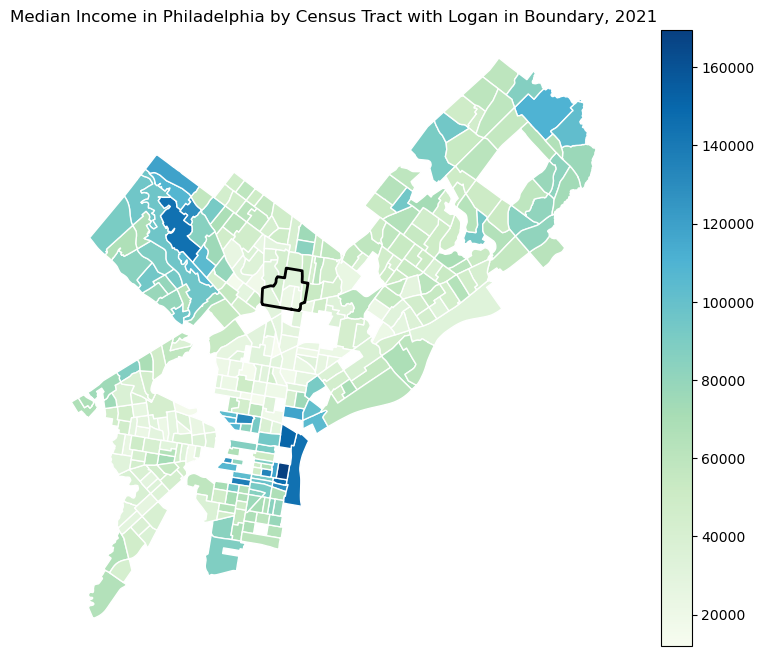

In [33]:
fig, ax = plt.subplots(figsize = (10,8)) 
tracts_income.plot(column = 'Median Household Income',legend=True,
  legend_kwds={'orientation': "vertical"},edgecolor='white',cmap = 'GnBu',ax=ax)
logan_boundary.geometry.boundary.plot(color=None,edgecolor='black',linewidth = 2,ax=ax)
ax.axis('off')
plt.title('Median Income in Philadelphia by Census Tract with Logan in Boundary, 2021')

#plt.savefig("logan and pa home value map.pdf", transparent=True)

In [34]:
logan_tracts.head()

,FIPS,geometry,Median Household Income,Median Household Income White,Median Household Income Black,Median Household Income Asian,Median Household Income Native Hawaiian Pacific Islander,Median Household Income Some Other Race,Median Household Income Two or More Races,Median Household Income Hispanic,Median Household Income White Alone Not Hispanic
100,42101028300,"POLYGON ((-75.14169 40.02076, -75.14159 40.020...",22297.0,NaN,20428.0,NaN,NaN,NaN,NaN,NaN,NaN
101,42101028400,"POLYGON ((-75.13571 40.02392, -75.13555 40.026...",21670.0,26326.0,21066.0,NaN,NaN,NaN,NaN,NaN,NaN
102,42101028500,"POLYGON ((-75.13527 40.02919, -75.13541 40.027...",49167.0,NaN,28750.0,NaN,65721.0,85892.0,NaN,85771.0,NaN
335,42101028000,"POLYGON ((-75.15385 40.02217, -75.15336 40.022...",31797.0,NaN,31797.0,NaN,NaN,NaN,61923.0,NaN,NaN
336,42101028100,"POLYGON ((-75.14658 40.03065, -75.14652 40.030...",46378.0,56231.0,39910.0,NaN,NaN,NaN,NaN,54015.0,NaN


In [35]:
#to create a bar chart comparing philly and logan averages create a new dataframe 
#create DataFrame
old_df = pd.DataFrame({'Geography': ['philadelphia', 'logan'],
                       'Median Household Income': [58714, 34024],
                       'Median Household Income White':[70310, 28352],
                       'Median Household Income Black': [48049, 26754]})
                      
old_df.head()

,Geography,Median Household Income,Median Household Income White,Median Household Income Black
0,philadelphia,58714,70310,48049
1,logan,34024,28352,26754


##### Creating bar charts of median income in various colors

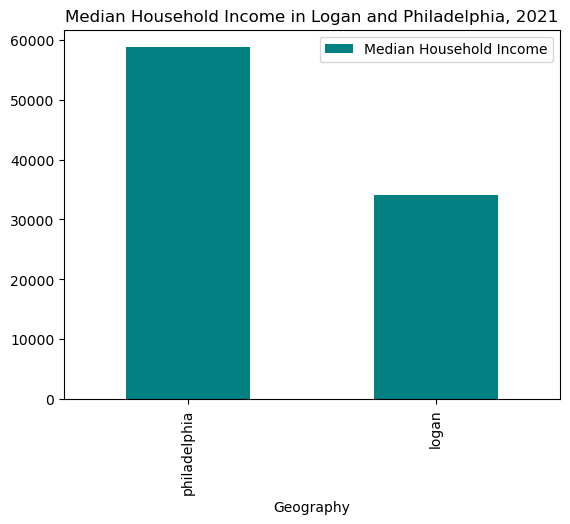

In [36]:
ax=old_df.plot.bar(x='Geography', 
                   y='Median Household Income',
                   title= 'Median Household Income in Logan and Philadelphia, 2021',
                   color= 'teal')

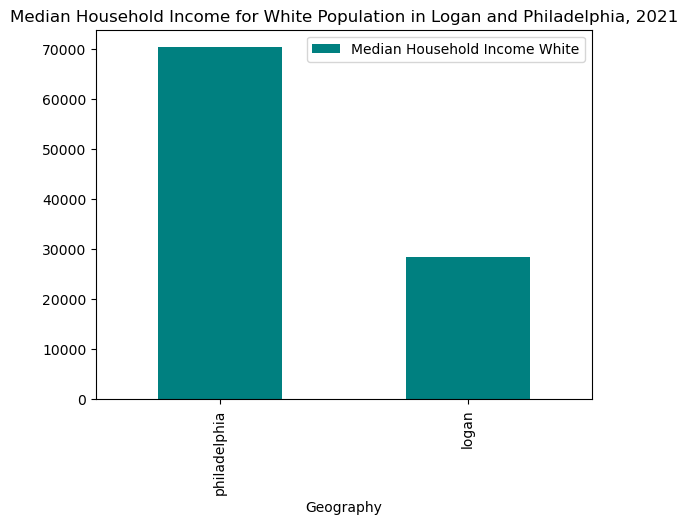

In [37]:
ax=old_df.plot.bar(x='Geography', 
                   y='Median Household Income White',
                   title= 'Median Household Income for White Population in Logan and Philadelphia, 2021',
                   color= 'teal')

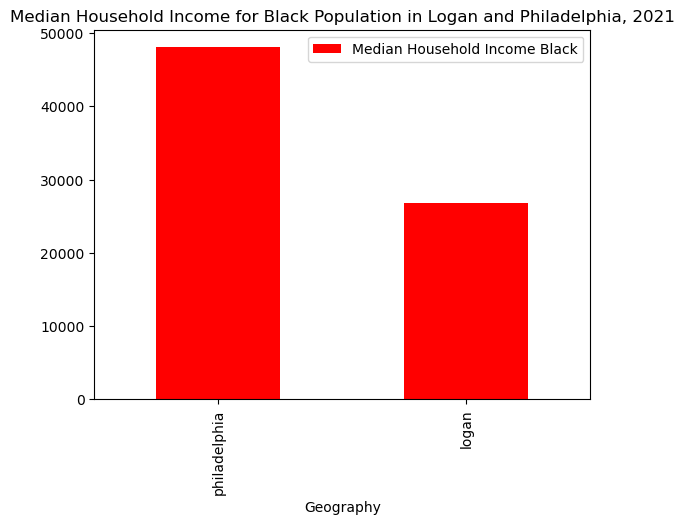

In [38]:
ax=old_df.plot.bar(x='Geography', 
                   y='Median Household Income Black',
                   title= 'Median Household Income for Black Population in Logan and Philadelphia, 2021',
                   color= 'red')

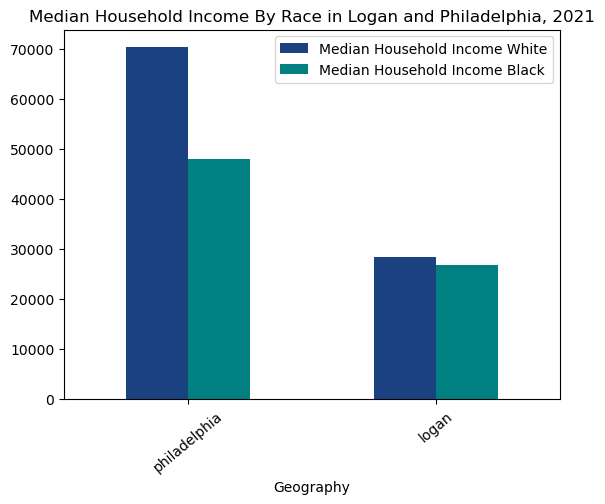

In [39]:
ax=old_df.plot.bar(x = 'Geography', y = ['Median Household Income White', 'Median Household Income Black'], rot = 40,
                   title='Median Household Income By Race in Logan and Philadelphia, 2021',
                   color=['#1a4280ff','teal'])
#creating bar chart by race